In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('darkgrid')

**Jus Preprocessing:**

In [4]:
df = pd.read_csv('adult.csv')
# print(df.head(10))

selected_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

df = df[selected_features]
df = df[:100]

# df.head(10)

df.replace('?', np.nan, inplace=True )
df = df.dropna()
df.replace('<=50K',0, inplace=True)
df.replace('>50K', 1, inplace=True)
df.head(10)
# print(len(df))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0
5,34,198693,6,0,0,30,0
6,29,227026,9,0,0,40,0
7,63,104626,15,3103,0,32,1
8,24,369667,10,0,0,40,0
9,55,104996,4,0,0,10,0


In [38]:
class FeatureSelection:
    def __init__(self):
        self.corr = 0

    def kendall(self, feature1, feature2):
        n_concordant = 0
        n_discordant = 0

        for i in range(len(feature1)):
            for j in range(i+1, len(feature1)):
                if (feature1[i] > feature1[j] and feature2[i] > feature2[j]) or (feature1[i] < feature1[j] and feature2[i] < feature2[j]):
                    n_concordant += 1
                elif (feature1[i] > feature1[j] and feature2[i] < feature2[j]) or (feature1[i] < feature1[j] and feature2[i] > feature2[j]):
                    n_discordant += 1

        kendall_corr = (n_concordant - n_discordant) / (n_concordant + n_discordant)

        return kendall_corr
        
    def pearson(self, X, Y):
        mean_X = sum(X) / len(X)
        mean_Y = sum(Y) / len(Y)

        x_minus_mean_x = []
        y_minus_mean_y = []
        for val in X:
            x_minus_mean_x.append(val-mean_X)

        for val in Y:
            y_minus_mean_y.append(val- mean_Y)

        x_minus_mean_x_sq = []
        y_minus_mean_y_sq = []

        for val in x_minus_mean_x:
            x_minus_mean_x_sq.append(val**2)
        
        for val in y_minus_mean_y:
            y_minus_mean_y_sq.append(val**2)

        numerator = 0
        for val1,val2 in zip(x_minus_mean_x, y_minus_mean_y):
            numerator+= (val1*val2)

        
        denom1 = sum(x_minus_mean_x_sq)
        denom2 = sum(y_minus_mean_y_sq)

        pearson = numerator / (math.sqrt(denom1)*math.sqrt(denom2))

        return pearson
        
        

        


In [39]:

# Initialize feature selection object
feature_selector = FeatureSelection()

# Calculate correlations using custom implementation
correlations_custom = {}
for feature1 in selected_features:
    for feature2 in selected_features:
        if feature1 != feature2:
            kendall_corr_custom = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr_custom = feature_selector.pearson(df[feature1], df[feature2])
            correlations_custom[(feature1, feature2)] = {'Kendall': kendall_corr_custom, 'Pearson': pearson_corr_custom}

# # Calculate correlations using built-in functions
# correlations_builtin = {}
# for feature1 in selected_features:
#     for feature2 in selected_features:
#         if feature1 != feature2:
#             kendall_corr_builtin, _ = kendalltau(df[feature1], df[feature2])
#             pearson_corr_builtin, _ = pearsonr(df[feature1], df[feature2])
#             correlations_builtin[(feature1, feature2)] = {'Kendall': kendall_corr_builtin, 'Pearson': pearson_corr_builtin}

# # Print correlations
for features in correlations_custom.keys():
    print(f"Correlations between {features[0]} and {features[1]}:")
    print(f"Custom Kendall correlation: {correlations_custom[features]['Kendall']}")
    # print(f"Built-in Kendall correlation: {correlations_builtin[features]['Kendall']}")
    print(f"Custom Pearson correlation: {correlations_custom[features]['Pearson']}")
    # print(f"Built-in Pearson correlation: {correlations_builtin[features]['Pearson']}")
    print()

Correlations between age and fnlwgt:
Custom Kendall correlation: -0.03611971104231166
Custom Pearson correlation: -0.07911474660842957

Correlations between age and educational-num:
Custom Kendall correlation: -0.06897442521312322
Custom Pearson correlation: -0.050820276252662666

Correlations between age and capital-gain:
Custom Kendall correlation: 0.36701337295690933
Custom Pearson correlation: 0.08906902188841893

Correlations between age and capital-loss:
Custom Kendall correlation: -0.65625
Custom Pearson correlation: -0.1506446040160098

Correlations between age and hours-per-week:
Custom Kendall correlation: 0.08155186064924783
Custom Pearson correlation: 0.012020949335679624

Correlations between age and income:
Custom Kendall correlation: 0.38684503901895206
Custom Pearson correlation: 0.2587690901082567

Correlations between fnlwgt and age:
Custom Kendall correlation: -0.03611971104231166
Custom Pearson correlation: -0.07911474660842957

Correlations between fnlwgt and educa

In [40]:

# Initialize feature selection object
feature_selector = FeatureSelection()

# Calculate correlations
correlations = {}
x = ['income']
for feature1 in x:
    for feature2 in selected_features:
        if feature1 != feature2:
            kendall_corr = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr = feature_selector.pearson(df[feature1], df[feature2])
            correlations[(feature1, feature2)] = {'Kendall': kendall_corr, 'Pearson': pearson_corr}

# Print correlations
for features, corr_values in correlations.items():
    print(f"Correlations between {features[0]} and {features[1]}:")
    print(f"Kendall correlation: {corr_values['Kendall']}")
    print(f"Pearson correlation: {corr_values['Pearson']}")
    print()


Correlations between income and age:
Kendall correlation: 0.38684503901895206
Pearson correlation: 0.2587690901082567

Correlations between income and fnlwgt:
Kendall correlation: 0.13486842105263158
Pearson correlation: 0.13590077473595585

Correlations between income and educational-num:
Kendall correlation: 0.524
Pearson correlation: 0.3626599095095683

Correlations between income and capital-gain:
Kendall correlation: 0.9757914338919925
Pearson correlation: 0.34452924039997845

Correlations between income and capital-loss:
Kendall correlation: -1.0
Pearson correlation: -0.08020283685336348

Correlations between income and hours-per-week:
Kendall correlation: 0.3863781031190325
Pearson correlation: 0.24018668018994405



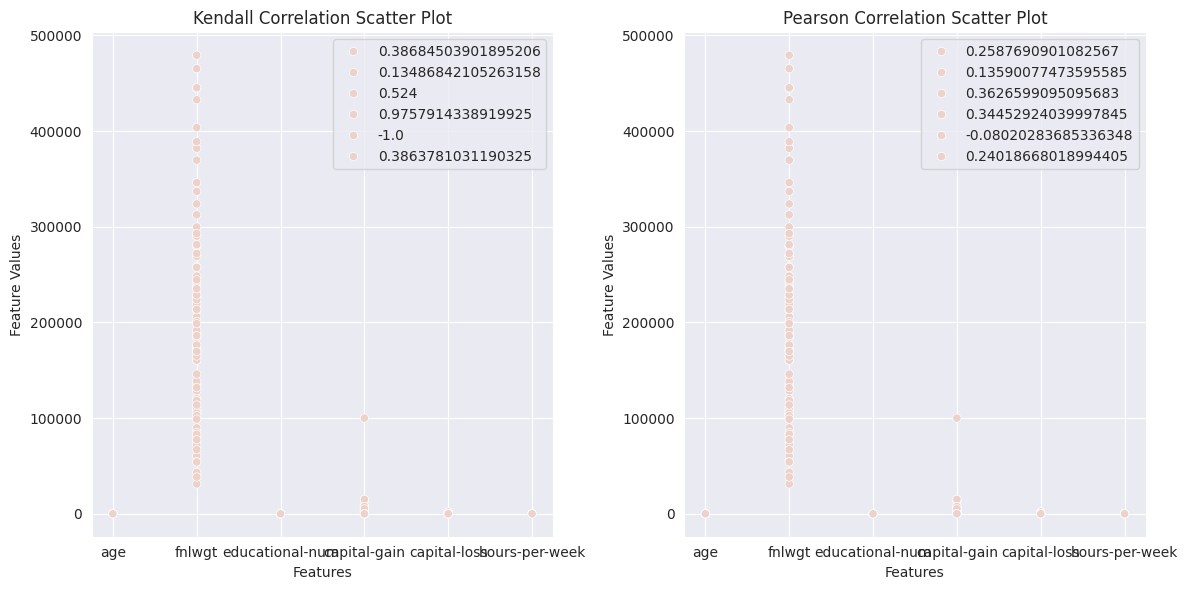

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize feature selection object
feature_selector = FeatureSelection()

# Calculate correlations
correlations = {}
pearson_corr_values = []
kendall_corr_values = []

x = ['income']
for feature1 in x:
    for feature2 in selected_features:
        if feature1 != feature2:
            kendall_corr = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr = feature_selector.pearson(df[feature1], df[feature2])
            correlations[(feature1, feature2)] = {'Kendall': kendall_corr, 'Pearson': pearson_corr}
            kendall_corr_values.append(kendall_corr)
            pearson_corr_values.append(pearson_corr)

# Plot scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for feature, kendall_corr in zip(selected_features, kendall_corr_values):
    sns.scatterplot(x=[feature] * len(df), y=df[feature], hue=kendall_corr)
plt.title('Kendall Correlation Scatter Plot')
plt.xlabel('Features')
plt.ylabel('Feature Values')

plt.subplot(1, 2, 2)
for feature, pearson_corr in zip(selected_features, pearson_corr_values):
    sns.scatterplot(x=[feature] * len(df), y=df[feature], hue=pearson_corr)
plt.title('Pearson Correlation Scatter Plot')
plt.xlabel('Features')
plt.ylabel('Feature Values')

plt.tight_layout()
plt.show()


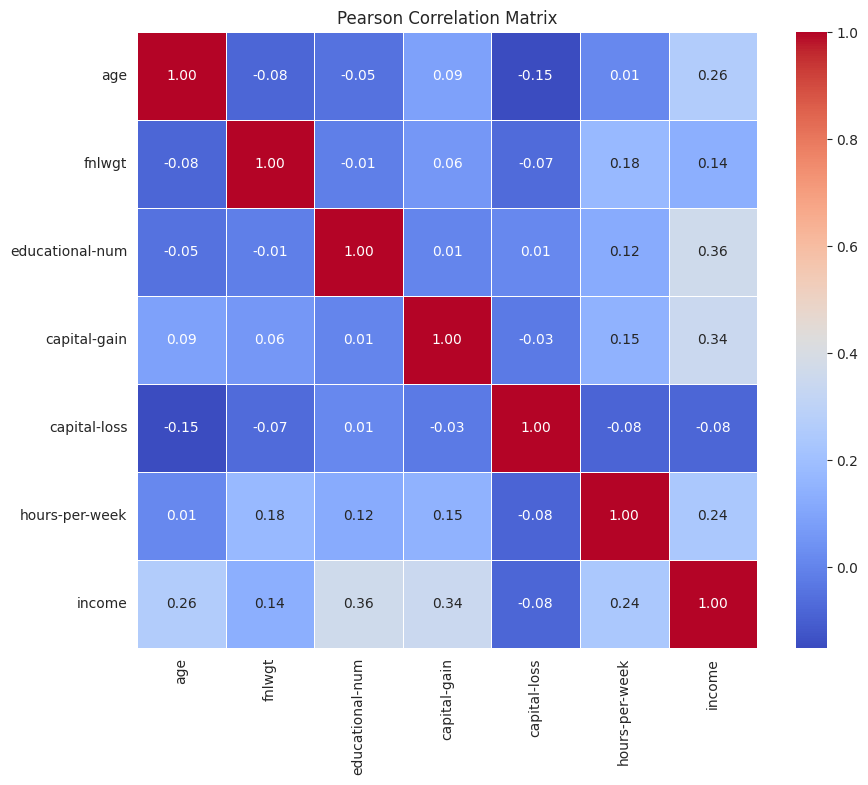

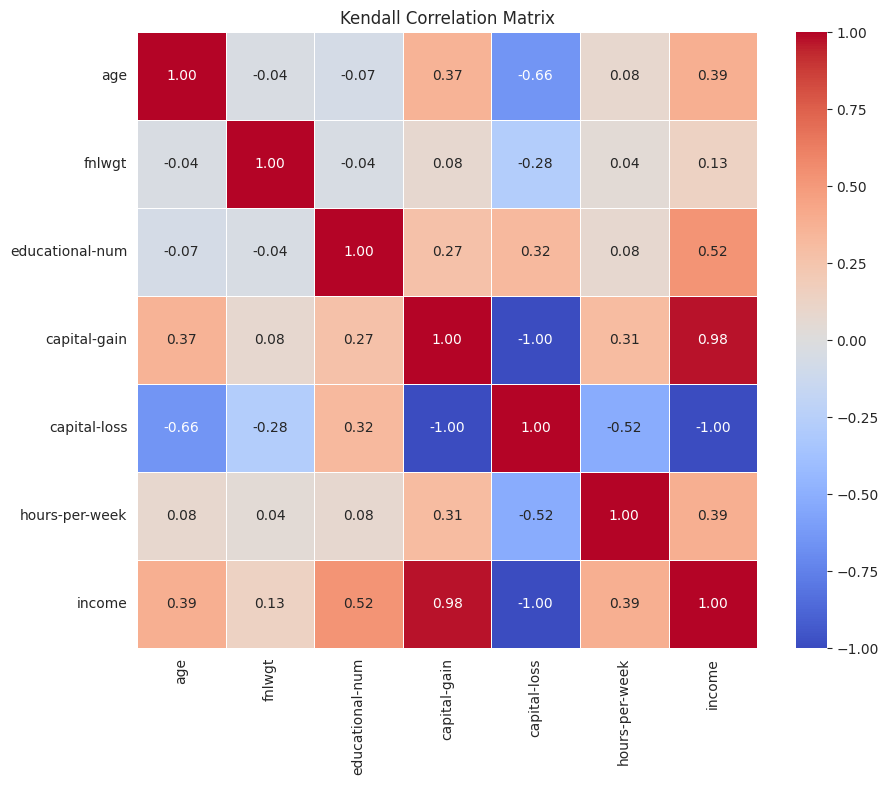

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize feature selection object
feature_selector = FeatureSelection()

# Calculate correlations
correlations = {}
pearson_corr_values = []
kendall_corr_values = []

x = ['income']
for feature1 in x:
    for feature2 in selected_features:
        if feature1 != feature2:
            kendall_corr = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr = feature_selector.pearson(df[feature1], df[feature2])
            correlations[(feature1, feature2)] = {'Kendall': kendall_corr, 'Pearson': pearson_corr}
            kendall_corr_values.append(kendall_corr)
            pearson_corr_values.append(pearson_corr)


# Create correlation matrices with feature names
pearson_corr_matrix = pd.DataFrame(index=selected_features, columns=selected_features, dtype=float)
kendall_corr_matrix = pd.DataFrame(index=selected_features, columns=selected_features, dtype=float)

for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        # if i != j:
            kendall_corr_matrix.at[feature1, feature2] = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr_matrix.at[feature1, feature2] = feature_selector.pearson(df[feature1], df[feature2])

# Plot Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plot Kendall correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Kendall Correlation Matrix')
plt.show()

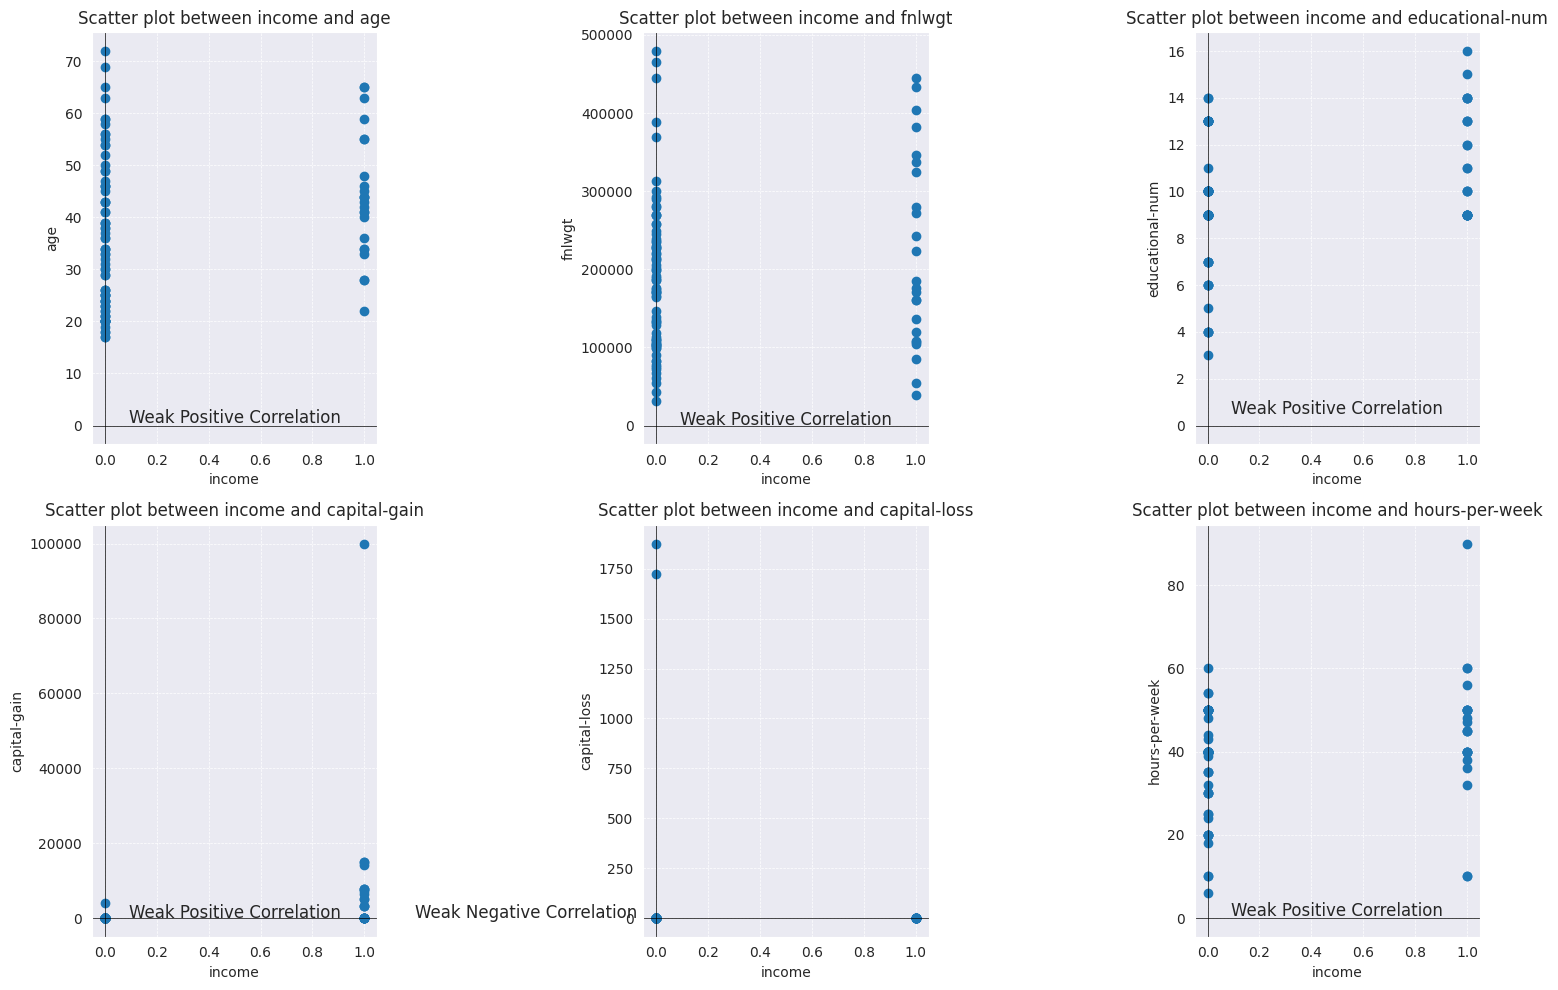

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize feature selection object
feature_selector = FeatureSelection()

# Calculate correlations
correlations = {}
x = ['income']
for feature1 in x:
    for feature2 in selected_features:
        if feature1 != feature2:
            kendall_corr = feature_selector.kendall(df[feature1], df[feature2])
            pearson_corr = feature_selector.pearson(df[feature1], df[feature2])
            correlations[(feature1, feature2)] = {'Kendall': kendall_corr, 'Pearson': pearson_corr}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot scatter plots with four quadrants for each Pearson correlation
for i, (features, corr_values) in enumerate(correlations.items()):
    feature1, feature2 = features
    pearson_corr = corr_values['Pearson']
    
    # Determine the position in the subplot grid
    row = i // 3
    col = i % 3
    
    # Create a scatter plot for the current feature pair
    ax = axes[row, col]
    ax.scatter(df[feature1], df[feature2])
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'Scatter plot between {feature1} and {feature2}')
    
    # Plot quadrants based on Pearson correlation
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    
    # Determine the quadrant based on the sign of the Pearson correlation
    if pearson_corr > 0:
        if pearson_corr >= 0.5:
            ax.text(0.5, 0.5, 'Highly Positive Correlation', fontsize=12, ha='center')
        else:
            ax.text(0.5, 0.5, 'Weak Positive Correlation', fontsize=12, ha='center')
    elif pearson_corr < 0:
        if pearson_corr <= -0.5:
            ax.text(-0.5, 0.5, 'Highly Negative Correlation', fontsize=12, ha='center')
        else:
            ax.text(-0.5, 0.5, 'Weak Negative Correlation', fontsize=12, ha='center')
    else:
        ax.text(0.5, 0.5, 'No Correlation', fontsize=12, ha='center')
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


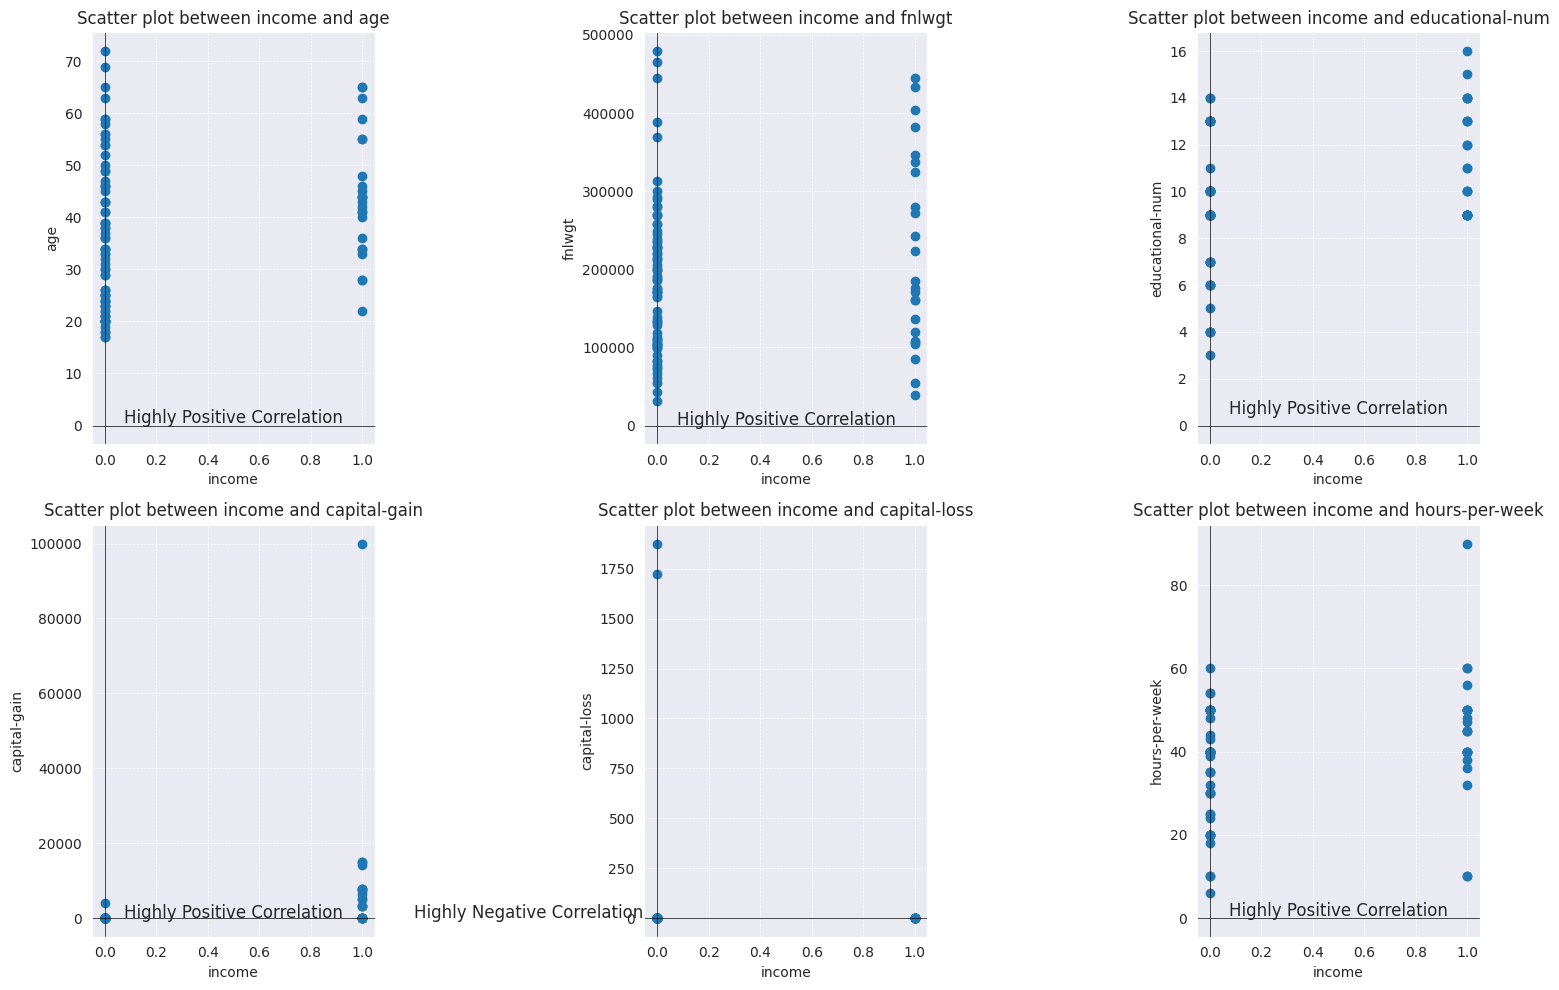

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot scatter plots with four quadrants for each Kendall correlation
for i, (features, corr_values) in enumerate(correlations.items()):
    feature1, feature2 = features
    kendall_corr = corr_values['Kendall']
    
    # Determine the position in the subplot grid
    row = i // 3
    col = i % 3
    
    # Create a scatter plot for the current feature pair
    ax = axes[row, col]
    ax.scatter(df[feature1], df[feature2])
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'Scatter plot between {feature1} and {feature2}')
    
    # Plot quadrants based on Kendall correlation
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    
    # Determine the quadrant based on the sign of the Kendall correlation
    if kendall_corr > 0:
        if kendall_corr >= 0.:
            ax.text(0.5, 0.5, 'Highly Positive Correlation', fontsize=12, ha='center')
        else:
            ax.text(0.5, 0.5, 'Weak Positive Correlation', fontsize=12, ha='center')
    elif kendall_corr < 0:
        if kendall_corr <= -0.5:
            ax.text(-0.5, 0.5, 'Highly Negative Correlation', fontsize=12, ha='center')
        else:
            ax.text(-0.5, 0.5, 'Weak Negative Correlation', fontsize=12, ha='center')
    else:
        ax.text(0.5, 0.5, 'No Correlation', fontsize=12, ha='center')
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()